<a href="https://colab.research.google.com/github/nurdankar/KerasAPI/blob/master/KerasAPI_DallananModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KERAS API İLE DALLANAN MODEL

## Gerekli Kütüphanelerin Import Edilmesi

In [ ]:
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.pooling import MaxPooling2D
from keras.layers.convolutional import Conv2D
from keras.layers.merge import concatenate

## Giriş Katmanı

In [ ]:
visible = Input(shape = (64, 64, 1))

## Öznitelik Çıkarma İşlemleri İçin Evrişim Katmanları

In [ ]:
# 1. Evrişim Katmanı
conv1 = Conv2D(32, kernel_size = 4, activation = 'relu')(visible)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
flat1 = Flatten()(pool1)

# 2. Evrişim Katmanı
conv2 = Conv2D(64, kernel_size = 8, activation = 'relu')(visible)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
flat2 = Flatten()(pool2)

# 3. Evrişim Katmanı
conv3 = Conv2D(16, kernel_size = 4, activation = 'relu')(visible)
pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
flat3 = Flatten()(pool3)

# 4. Evrişim Katmanı
conv4 = Conv2D(128, kernel_size = 16, activation = 'relu')(visible)
pool4 = MaxPooling2D(pool_size=(4, 4))(conv4)
flat4 = Flatten()(pool4)

# 1. Birleştirme Katmanı
merge1 = concatenate([flat1, flat2])
hidden1 = Dense(10, activation='relu')(merge1)

# 2. Birleştirme Katmanı
merge2 = concatenate([flat3, flat4])
hidden2 = Dense(10, activation='relu')(merge2)

# 3. Birleştirme Katmanı
merge3 = concatenate([hidden1, hidden2])
hidden3 = Dense(20, activation='relu')(merge3)

# Çıkış Katmanı
output = Dense(1, activation='sigmoid')(hidden3)
model = Model(inputs = visible, outputs = output)


## Modelin Özeti

In [ ]:
model.summary()

Model: "functional_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 64, 64, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_9 (Conv2D)               (None, 61, 61, 32)   544         input_3[0][0]                    
__________________________________________________________________________________________________
conv2d_10 (Conv2D)              (None, 57, 57, 64)   4160        input_3[0][0]                    
__________________________________________________________________________________________________
conv2d_11 (Conv2D)              (None, 61, 61, 16)   272         input_3[0][0]                    
_______________________________________________________________________________________

## Modelin Görselleştirilmesi

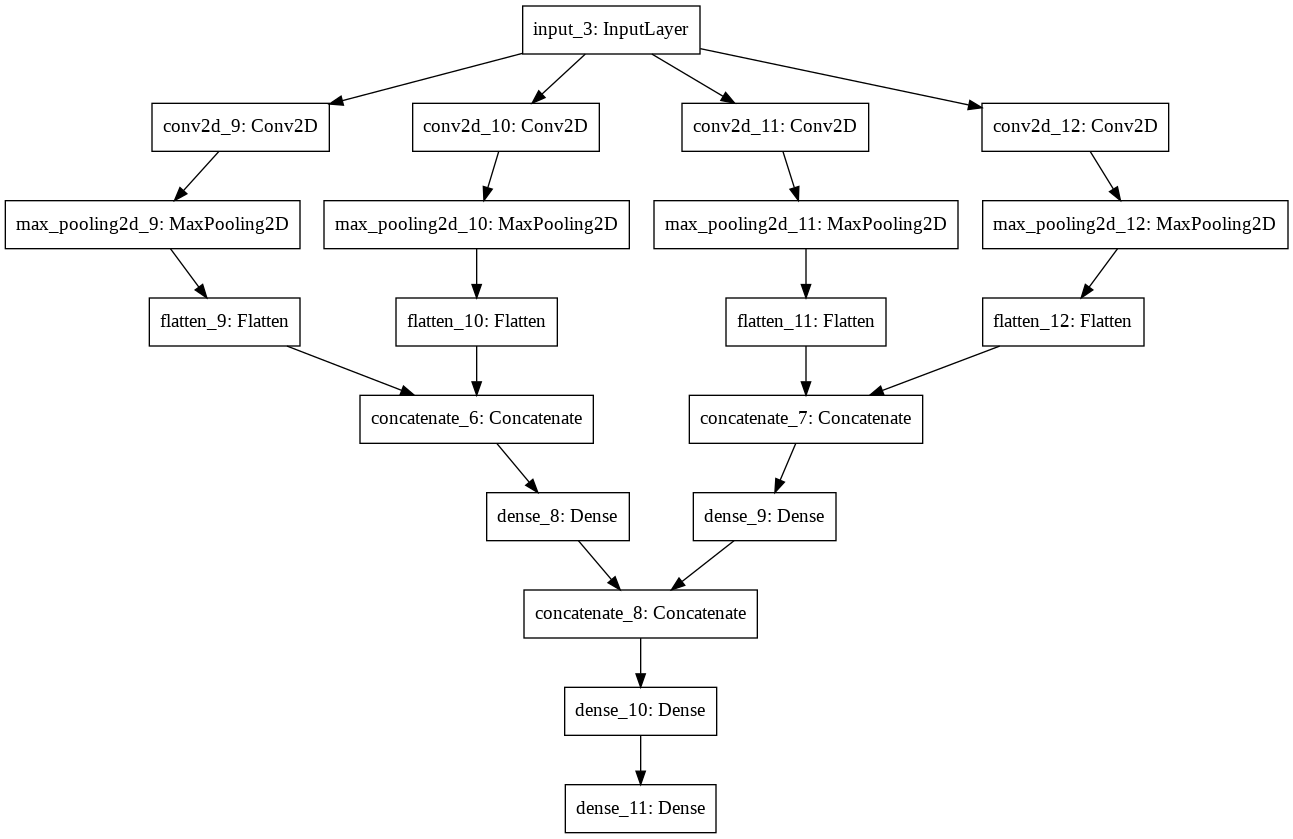

In [ ]:
plot_model(model, to_file = 'model.png')